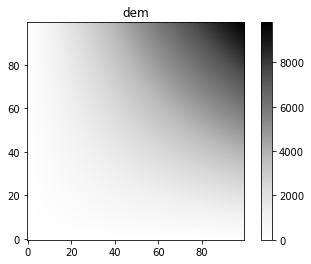

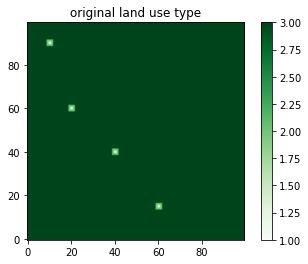

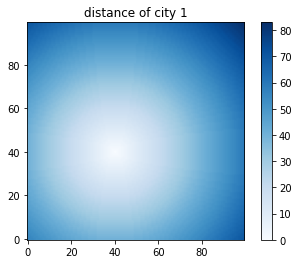

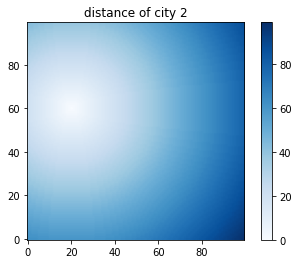

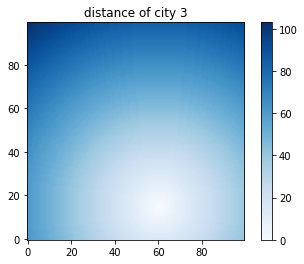

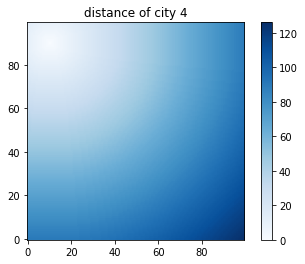

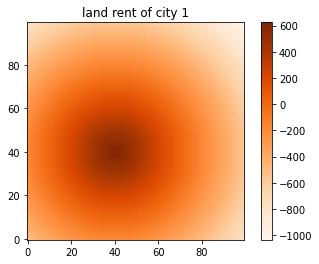

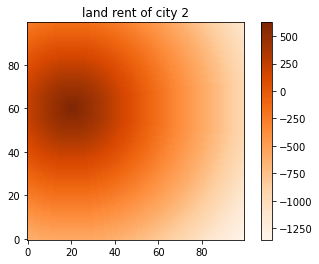

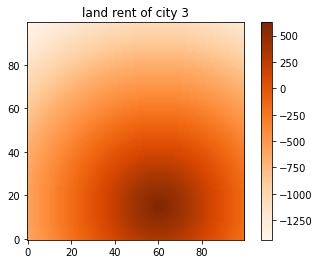

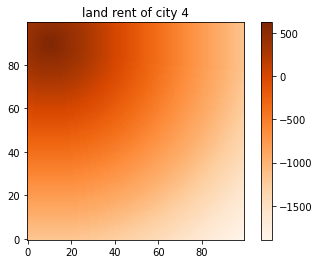

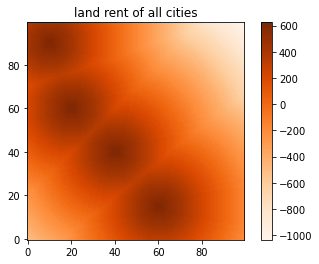

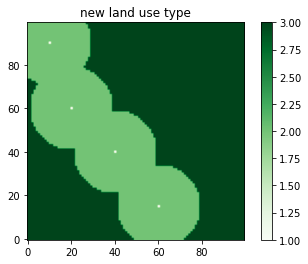

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def fun_lulcc_toy(c_value=550, y=100, p=10, l=50, w=5, k=5, q=25, v=20, f_top=0.01, nx=10, ny=10, geo_city=pd.DataFrame([[3,5,8],[3,6,2]]), dem=pd.DataFrame()):
  geo_city = geo_city.transpose()
  n_city = len(geo_city)
  if dem.empty==True:
    topo = []
    for i in range(nx):
      tmp = []
      for j in range(ny):
        tmp.append(i*j)
      topo.append(tmp)
    topo = pd.DataFrame(topo)
  else:
    topo = dem.copy()
  plt.imshow(topo, cmap ="Greys")
  plt.colorbar()
  plt.title("dem")
  plt.gca().invert_yaxis()
  plt.show()
  lu = topo.copy()
  for i in range(nx):
    for j in range(ny):
      lu[i][j] = 3
  for i in range(n_city):
    lu[geo_city[0][i]][geo_city[1][i]+1] = 2
    lu[geo_city[0][i]][geo_city[1][i]-1] = 2
    lu[geo_city[0][i]+1][geo_city[1][i]+1] = 2
    lu[geo_city[0][i]+1][geo_city[1][i]-1] = 2
    lu[geo_city[0][i]-1][geo_city[1][i]+1] = 2
    lu[geo_city[0][i]-1][geo_city[1][i]-1] = 2
    lu[geo_city[0][i]+1][geo_city[1][i]] = 2
    lu[geo_city[0][i]-1][geo_city[1][i]] = 2
  for i in range(n_city):
    lu[geo_city[0][i]][geo_city[1][i]] = 1
  origin = lu.copy()
  plt.imshow(origin, cmap ="Greens")
  plt.colorbar()
  plt.title("original land use type")
  plt.gca().invert_yaxis()
  plt.show()
  def fun_dis(pt_1, pt_2):
    dis = ((pt_2[0]-pt_1[0])**2 + (pt_2[1]-pt_1[1])**2)**(1/2)
    return dis
  tmp_dis = []
  dis = lu.copy()
  for z in range(n_city):
    pt_1 = [geo_city[0][z], geo_city[1][z]]
    for i in range(nx):
      for j in range(ny):
        pt_2 = [i, j]
        dis[i][j] = fun_dis(pt_1, pt_2)
    tmp_dis.append(dis.copy())
    string = "distance of city " + str(z+1)
    plt.imshow(dis, cmap ="Blues")
    plt.colorbar()
    plt.title(string)
    plt.gca().invert_yaxis()
    plt.show()
  tmp_rent = []
  rent = lu.copy()
  for z in range(n_city):
    for i in range(nx):
      for j in range(ny):
        rent[i][j] = p*y-l*w-k*q-v*(topo[i][j]*f_top+tmp_dis[z][i][j])
    tmp_rent.append(rent.copy())
    string = "land rent of city " + str(z+1)
    plt.imshow(rent, cmap ="Oranges")
    plt.colorbar()
    plt.title(string)
    plt.gca().invert_yaxis()
    plt.show()
  res = lu.copy()
  for i in range(nx):
    for j in range(ny):
      tmp_cp = []
      for z in range(n_city):
        tmp_cp.append(tmp_rent[z][i][j])
      res[i][j] = max(tmp_cp)
  plt.imshow(res, cmap ="Oranges")
  plt.colorbar()
  plt.title("land rent of all cities")
  plt.gca().invert_yaxis()
  plt.show()
  lu_new = lu.copy()
  for i in range(nx):
    for j in range(ny):
      if res[i][j]>=c_value and lu[i][j]==3:
        lu_new[i][j] = 2
  plt.imshow(lu_new, cmap ="Greens")
  plt.colorbar()
  plt.title("new land use type")
  plt.gca().invert_yaxis()
  plt.show()

fun_lulcc_toy(f_top=0,nx=100,ny=100,c_value=250,geo_city=pd.DataFrame([[40,20,60,10],[40,60,15,90]]))